# project Data Mining 

## Done by :Ben Abdesselem Mohamed Amine 

## Lung Cancer Analysis & Prediction

### Lung cancer is a type of cancer that begins in the lungs. Lungs are two spongy organs in our chest that take in oxygen when we inhale and release carbon dioxide when we exhale. Lung cancer is the leading cause of cancer deaths worldwide.
### People who smoke have the greatest risk of lung cancer, though lung cancer can also occur in people who have never smoked. The risk of lung cancer increases with the length of time and number of cigarettes someone's smoked. If someone quits smoking, even after smoking for many years, he/she can significantly reduce the chances of developing lung cancer.

### understanding the dataset :

- GENDER: M [Male], F [Female]
- AGE: Age of patients
- SMOKING: 2 [Yes], 1 [No]
- YELLOW_FINGERS: 2 [Yes], 1 [No]
- ANXIETY: 2 [Yes], 1 [No]
- PEER_PRESSURE: 2 [Yes], 1 [No]
- CHRONIC_DISEASE: 2 [Yes], 1 [No]
- FATIGUE: 2 [Yes], 1 [No]
- ALLERGY: 2 [Yes], 1 [No]
- WHEEZING: 2 [Yes], 1 [No]
- ALCOHOL_CONSUMING: 2 [Yes], 1 [No]
- COUGHING: 2 [Yes], 1 [No]
- SHORTNESS_OF_BREATH: 2 [Yes], 1 [No]
- SWALLOWING_DIFFICULTY: 2 [Yes], 1 [No]
- CHEST_PAIN: 2 [Yes], 1 [No]
- LUNG_CANCER: YES [Positive], NO [Negative]


### Importing and Preprocessing¶


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
import numpy as np
from sklearn.feature_selection import f_classif, SelectKBest,chi2
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import ConvergenceWarning
from sklearn.preprocessing import StandardScaler


In [2]:
df=pd.read_csv('survey lung cancer.csv')

In [3]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

### Here, we can see there is no null value exists in this dataset. Let's check if there exists any duplicate entry in this dataset. If exists then we will remove them from the dataset. After that we will initialize the visualization style and custom pallete for visualization.

In [5]:
df.duplicated().sum()

33

### There are 33 duplicate entries among 309 entries in this dataset.

In [6]:
df.drop_duplicates()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,F,59,1,2,2,2,1,1,2,2,1,2,1,2,1,YES
280,F,59,2,1,1,1,2,2,2,1,1,1,2,1,1,NO
281,M,55,2,1,1,1,1,2,2,1,1,1,2,1,2,NO
282,M,46,1,2,2,1,1,1,1,1,1,1,1,2,2,NO


### After removing duplicate entries there are 276 entries in this dataset.

### Let's replace all the numeric values into categorical values for better and efficient visualization. All the 2's and 1's will be replaced by "YES" and "NO" accordingly. And replace "M" and "F" by "Male" and "Female" accordingly in "GENDER" column.

In [7]:
df['GENDER']=df['GENDER'].replace(['M', 'F'],[0,1])
df['LUNG_CANCER']=df['LUNG_CANCER'].replace(['YES', 'NO'],[1,0])
replacement_map = {2: 1, 1: 0}

exclude_columns = ['LUNG_CANCER', 'GENDER']

df.loc[:, df.columns.difference(exclude_columns)] = df.loc[:, df.columns.difference(exclude_columns)].replace(replacement_map)

In [8]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,0,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,1,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,0,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,1,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,1,56,0,0,0,1,1,1,0,0,1,1,1,1,0,1
305,0,70,1,0,0,0,0,1,1,1,1,1,1,0,1,1
306,0,58,1,0,0,0,0,0,1,1,1,1,0,0,1,1
307,0,67,1,0,1,0,0,1,1,0,1,1,1,0,1,1


### let's look at the target column (LUNG_CANCER)

### Data outline

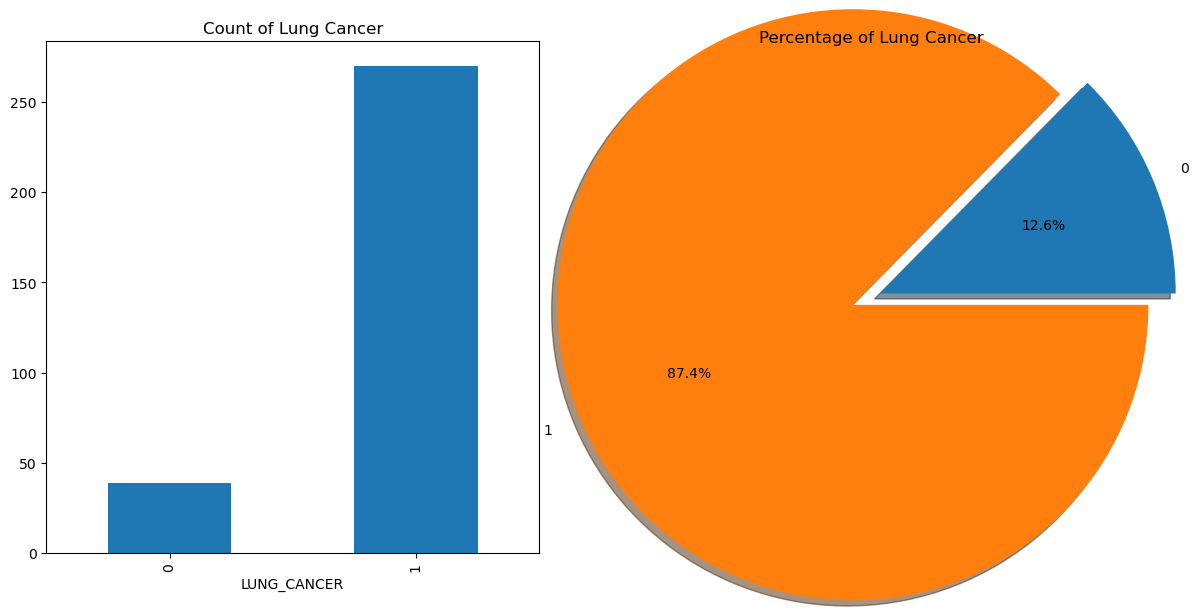

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
df.groupby('LUNG_CANCER')['LUNG_CANCER'].count().plot.bar(ax=ax1)
ax1.set_title('Count of Lung Cancer')

r = df.groupby('LUNG_CANCER')['LUNG_CANCER'].count()
ax2.pie(r, explode=[0.05, 0.1], labels=['0', '1'], radius=1.5, autopct='%1.1f%%', shadow=True)
ax2.set_title('Percentage of Lung Cancer')

plt.tight_layout() 
plt.show()

### there's 87.4% of 1 (yes) and 12.6% of 0 (no)

In [10]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

### let's see a visualisation for each features compared to our target column (LUNG_CANCER)

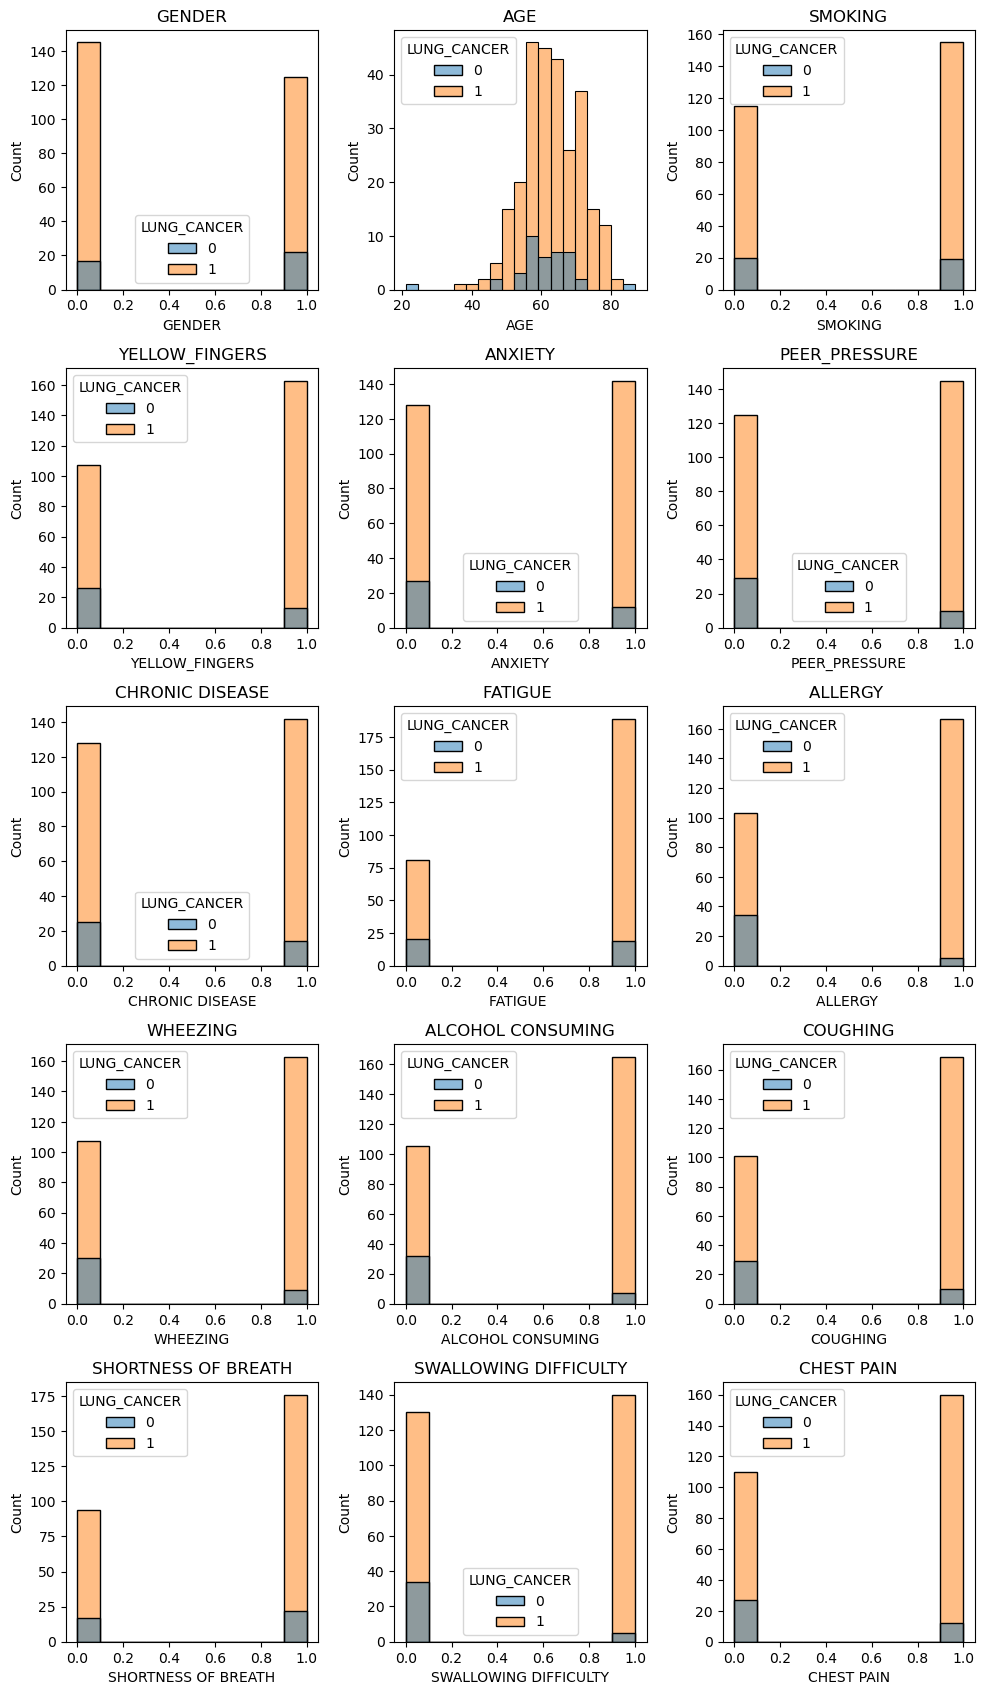

In [11]:
num_list=['GENDER' ,'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN']
fig = plt.figure(figsize=(10,20))

for i in range(len(num_list)):
    plt.subplot(6,3,i+1)
    plt.title(num_list[i])
    sns.histplot(data=df,x=df[num_list[i]],hue='LUNG_CANCER')

plt.tight_layout()

### let's see the correlation of our data set's columns 

<Axes: >

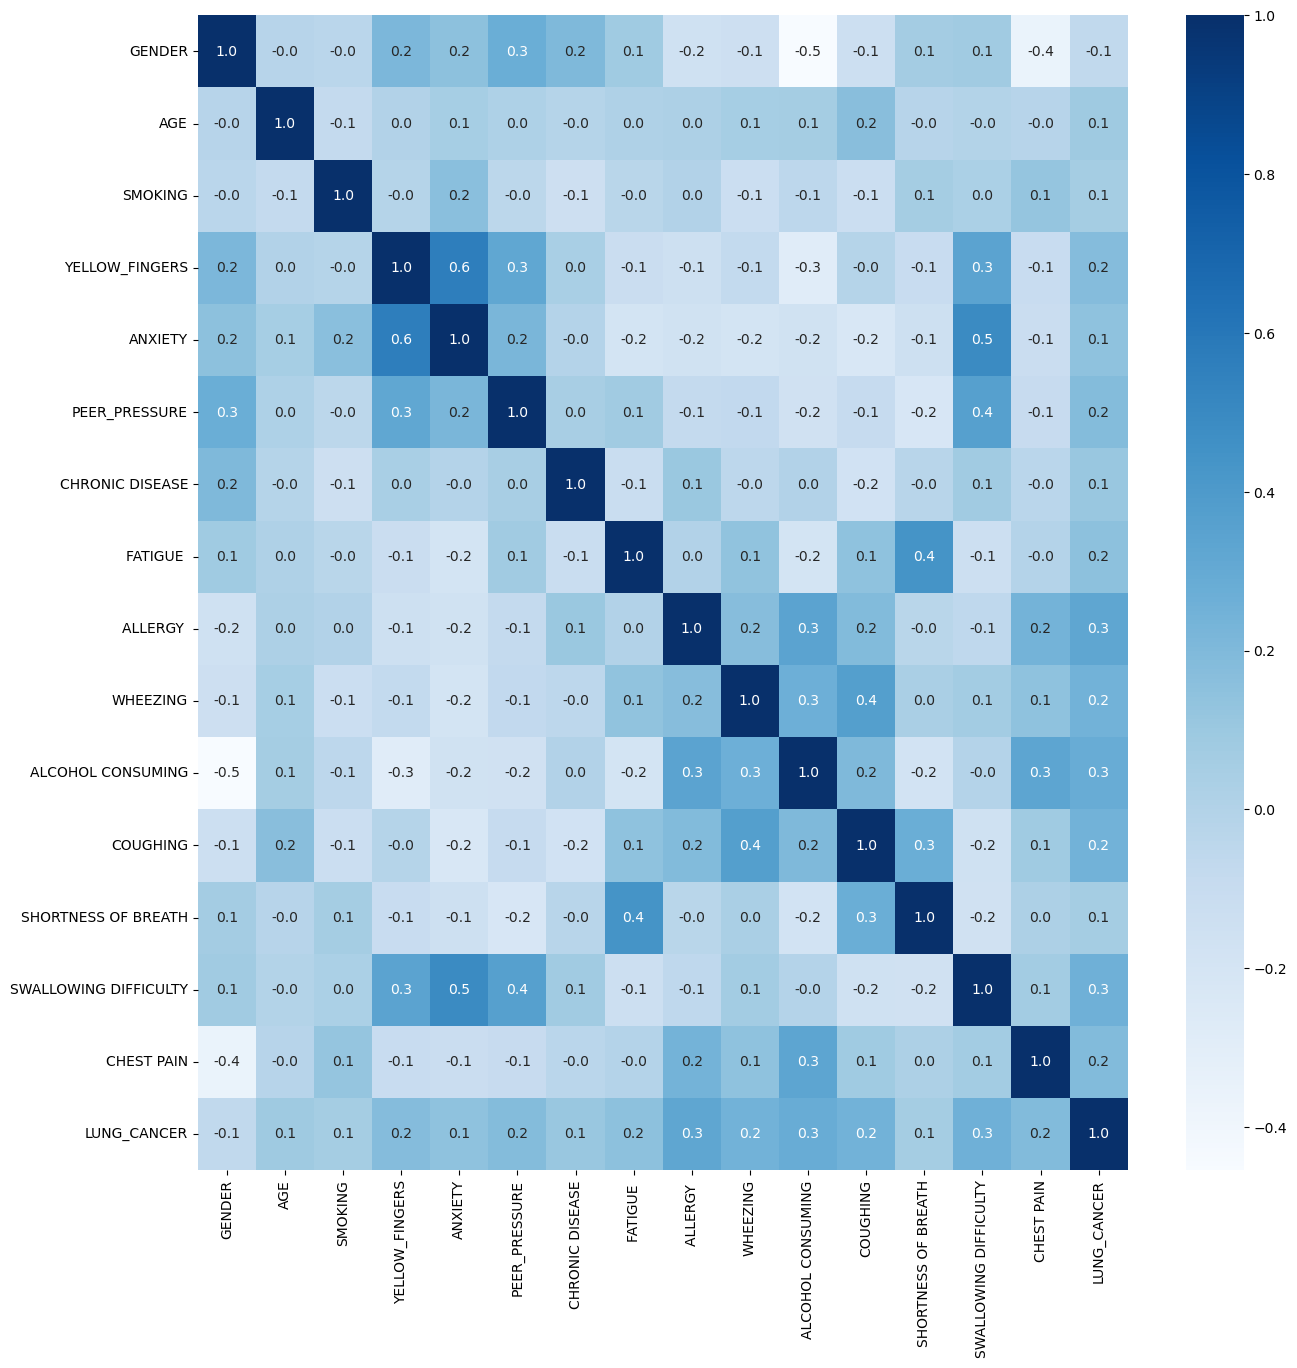

In [12]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(),annot=True, cbar=True, cmap='Blues', fmt='.1f')

### Correlation Among Features

- 'ANXIETY' and 'YELLOW_FINGERS': 0.6
- 'ANXIETY' and 'SWALLOWING DIFFICULTY': 0.5
- 'PEER_PRESSURE' and 'SWALLOWING DIFFICULTY': 0.4
- 'FATIGUE' and 'SHORTNESS OF BREATH': 0.4
- 'GENDER' and 'CHEST PAIN': -0.4
- 'GENDER' and 'ALCOHOL CONSUMING': -0.5

### Correlation with 'LUNG CANCER'

- 'ALLERGY', 'ALCOHOL CONSUMING', and 'SWALLOWING DIFFICULTY': 0.3
- 'YELLOW_FINGERS', 'PEER_PRESSURE', 'FATIGUE', 'WHEEZING', 'COUGHING', and 'CHEST PAIN': 0.2


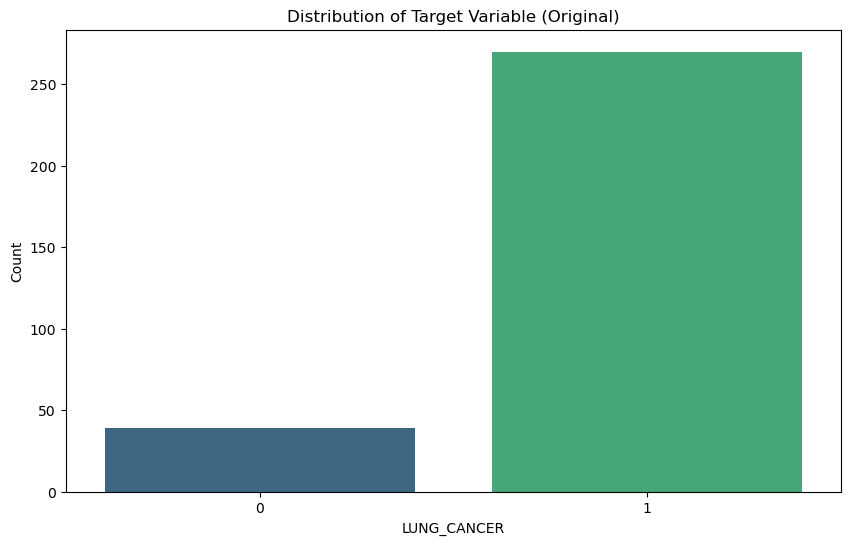

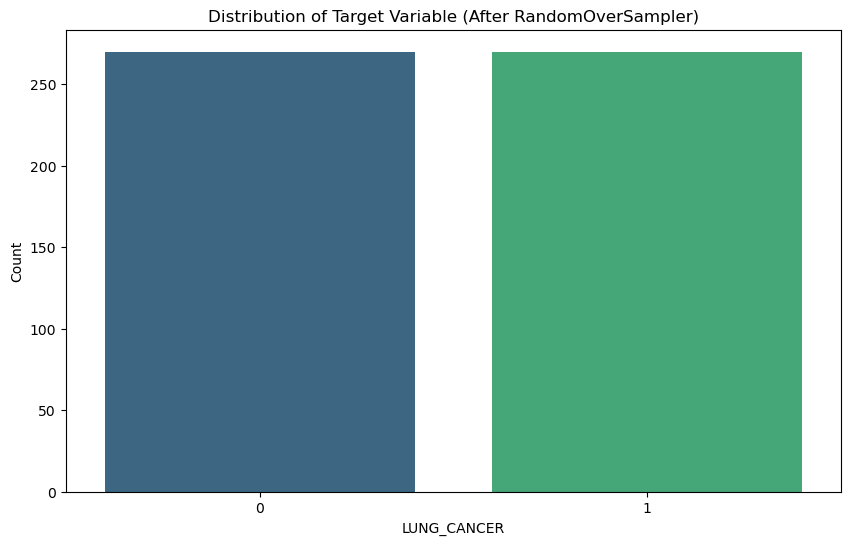

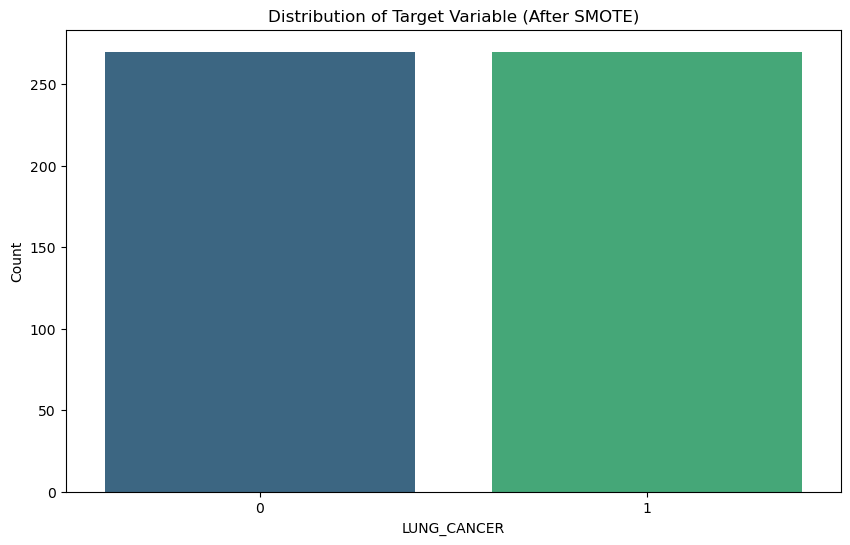

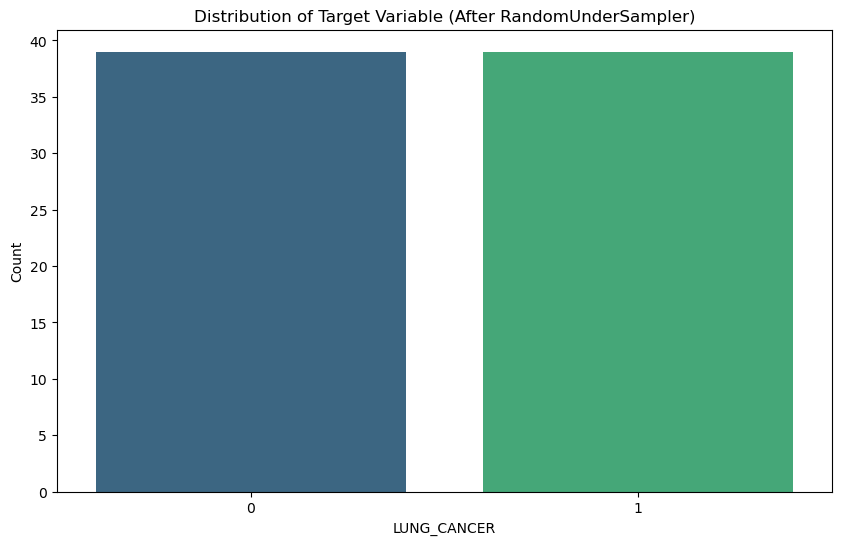

In [13]:
X = df.drop(columns=["LUNG_CANCER","GENDER",])
y = df["LUNG_CANCER"]


plt.figure(figsize=(10, 6))
sns.countplot(x=y, palette='viridis')
plt.title('Distribution of Target Variable (Original)')
plt.xlabel('LUNG_CANCER')
plt.ylabel('Count')
plt.show()

ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)

plt.figure(figsize=(10, 6))
sns.countplot(x=y_ros, palette='viridis')
plt.title('Distribution of Target Variable (After RandomOverSampler)')
plt.xlabel('LUNG_CANCER')
plt.ylabel('Count')
plt.show()

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

plt.figure(figsize=(10, 6))
sns.countplot(x=y_smote, palette='viridis')
plt.title('Distribution of Target Variable (After SMOTE)')
plt.xlabel('LUNG_CANCER')
plt.ylabel('Count')
plt.show()

rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)

plt.figure(figsize=(10, 6))
sns.countplot(x=y_rus, palette='viridis')
plt.title('Distribution of Target Variable (After RandomUnderSampler)')
plt.xlabel('LUNG_CANCER')
plt.ylabel('Count')
plt.show()


### features selection 

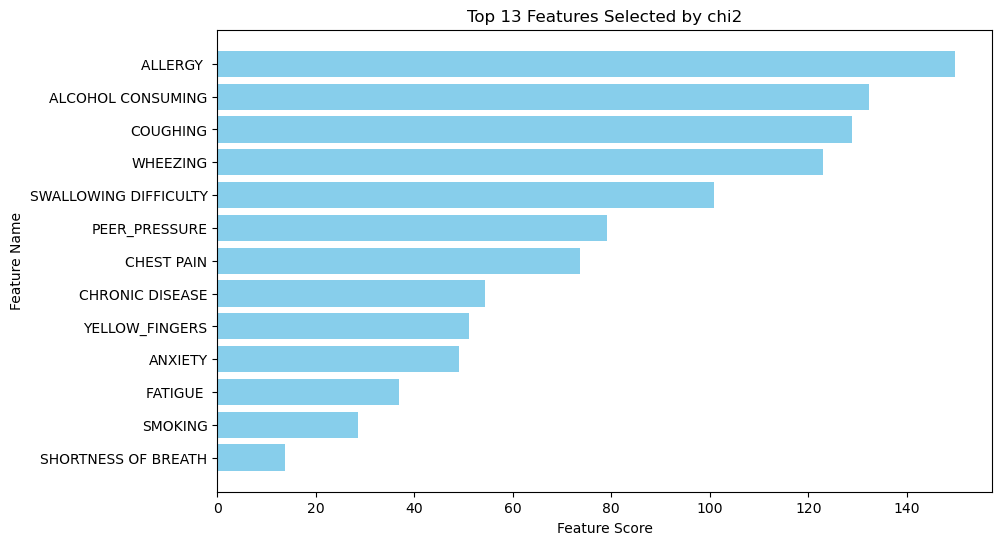

Selected features based on chi2: ['SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']


In [14]:
k = 13
selector = SelectKBest(score_func=chi2, k=k)
X_selected = selector.fit_transform(X_smote, y_smote)
feature_scores_kb = selector.scores_
feature_names_kb = X_smote.columns
selected_feature_names = feature_names_kb[selector.get_support()].tolist()  


sorted_indices = np.argsort(feature_scores_kb)[::-1]
sorted_feature_scores = feature_scores_kb[sorted_indices]
sorted_feature_names = feature_names_kb[sorted_indices]

plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names[:k], sorted_feature_scores[:k], color='skyblue')
plt.xlabel('Feature Score')
plt.ylabel('Feature Name')
plt.title('Top {} Features Selected by chi2'.format(k))
plt.gca().invert_yaxis()
plt.show()

print("Selected features based on chi2:", selected_feature_names)

###  so we will select these  features for  tuning our models 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_smote,y_smote,test_size=0.3,random_state=42)

### RFECV

### Best features selection  for random forest 

Selected features for random forest: ['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']


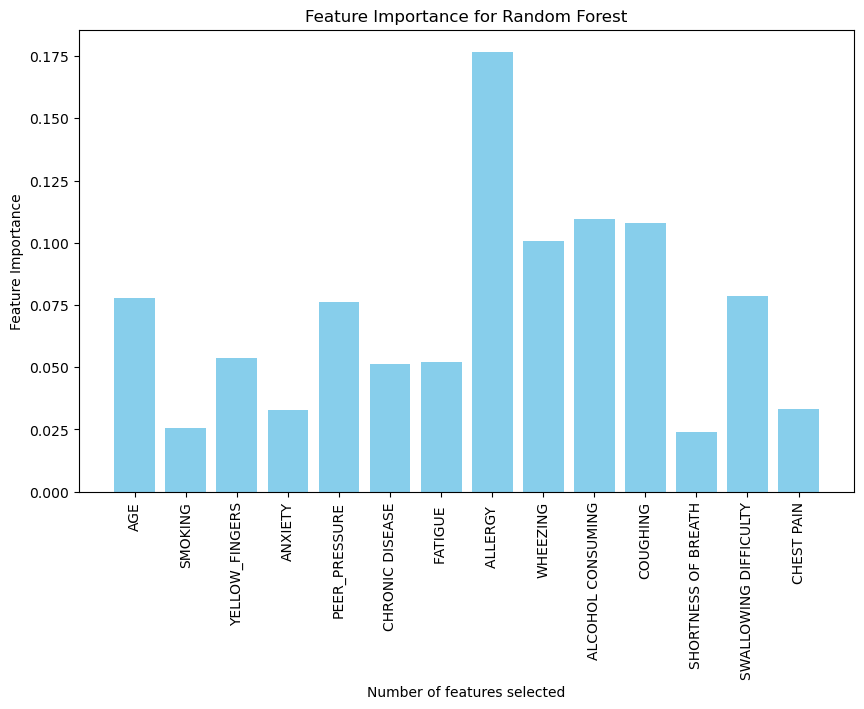

In [16]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

feature_importances = rf_classifier.feature_importances_

threshold = 0.02
selected_features_rf = X_train.columns[feature_importances > threshold]

print("Selected features for random forest:", selected_features_rf.tolist())

plt.figure(figsize=(10, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Feature Importance")
plt.bar(selected_features_rf, feature_importances[feature_importances > threshold], color='skyblue')
plt.xticks(rotation='vertical')
plt.title("Feature Importance for Random Forest")
plt.show()

### Best features selection  for decision tree 

Selected features for decision tree: ['AGE', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY']


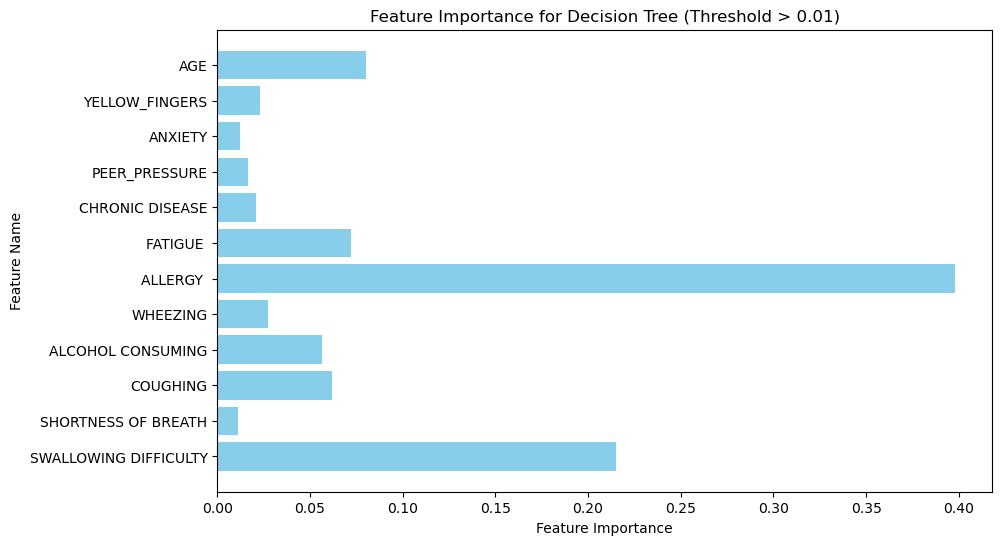

In [17]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

feature_importances_dt = dt_classifier.feature_importances_

threshold = 0.01
selected_features_dt = X_train.columns[feature_importances_dt > threshold]

print("Selected features for decision tree:", selected_features_dt.tolist())

plt.figure(figsize=(10, 6))
plt.barh(selected_features_dt, feature_importances_dt[feature_importances_dt > threshold], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance for Decision Tree (Threshold > {})'.format(threshold))
plt.gca().invert_yaxis()
plt.show()

### Best features selection  for logistic regression 

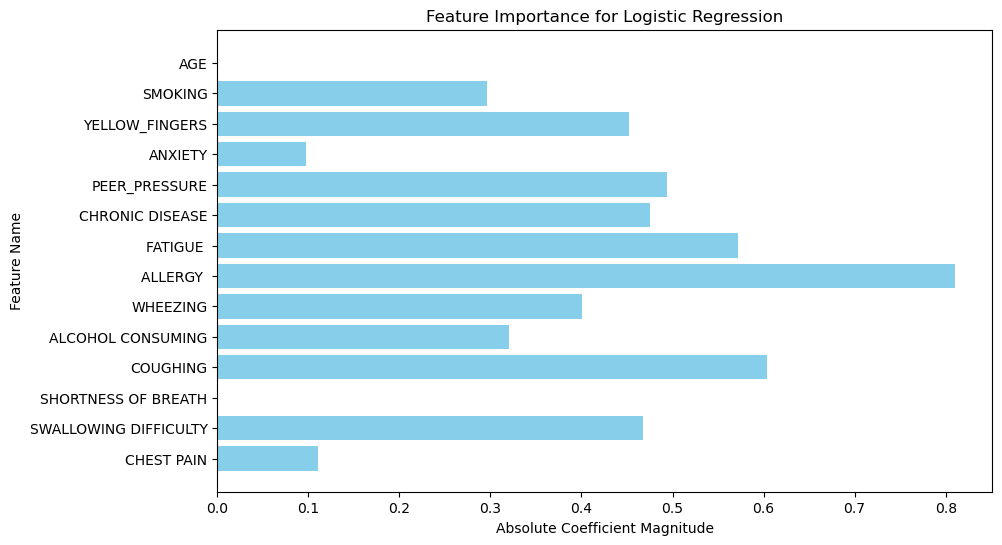

In [18]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Logistic Regression with regularization and increased max_iter
logreg_model = LogisticRegression(max_iter=1000, solver='saga', penalty='l1', C=0.1)
logreg_model.fit(X_train_scaled, y_train)

coefficients = logreg_model.coef_[0]

plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, np.abs(coefficients), color='skyblue')
plt.xlabel('Absolute Coefficient Magnitude')
plt.ylabel('Feature Name')
plt.title('Feature Importance for Logistic Regression')
plt.gca().invert_yaxis()
plt.show()

### logistic Regression 

### Now , i will see the best parameters for our logistic regression model

In [19]:
selected_features_lr=['SMOKING','YELLOW_FINGERS','ANXIETY','PEER_PRESSURE','CHRONIC DISEASE','FATIGUE ','ALLERGY ','WHEEZING','ALCOHOL CONSUMING','COUGHING','SWALLOWING DIFFICULTY','CHEST PAIN']
X_train_selected_lr = X_train[selected_features_lr]
lr_model = LogisticRegression(solver='liblinear', penalty='l1', random_state=0)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(lr_model, param_grid, cv=5)
grid_search.fit(X_train_selected_lr, y_train)
print("Best Parameters for Logistic Regression:", grid_search.best_params_)
print("Best Score for Logistic Regression:", grid_search.best_score_)

Best Parameters for Logistic Regression: {'C': 1}
Best Score for Logistic Regression: 0.9550175438596492


In [21]:
best_lr_model = LogisticRegression(C=10, random_state=0)

best_lr_model.fit(X_train_selected_lr, y_train)

y_lr_pred = best_lr_model.predict(X_test[selected_features_lr])


In [53]:
lr_cr=classification_report(y_test, y_lr_pred)
print(lr_cr)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        81
           1       0.94      0.96      0.95        81

    accuracy                           0.95       162
   macro avg       0.95      0.95      0.95       162
weighted avg       0.95      0.95      0.95       162



 - **Precision**: The model correctly predicts negative cases (0) 96% of the time and positive cases (1) 94% of the time.
- **Recall**: The model captures 94% of actual positive cases and 96% of actual negative cases.
- **F1-score**: The harmonic mean of precision and recall is 95%, indicating a balance between precision and recall.
- **Accuracy**: The overall accuracy of the model is 95%, meaning it correctly predicts outcomes 95% of the time.

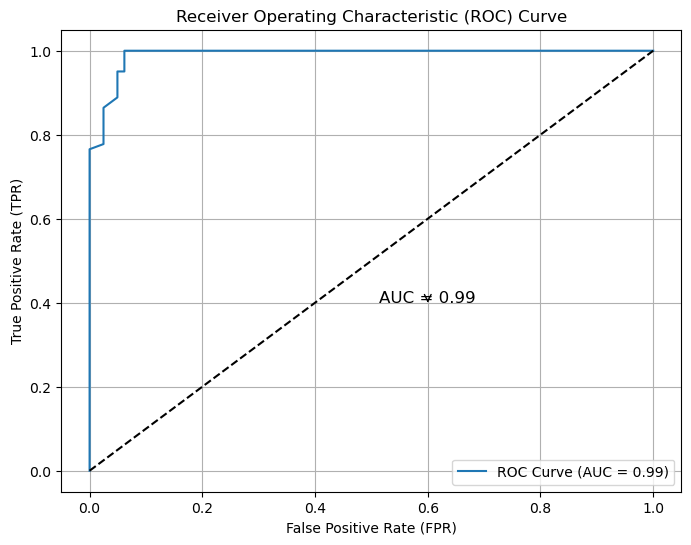

In [54]:
y_lr_prob = best_lr_model.predict_proba(X_test[selected_features_lr])[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_lr_prob)
auc = roc_auc_score(y_test, y_lr_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

plt.annotate(f'AUC = {auc:.2f}', xy=(0.6, 0.4), xytext=(0.6, 0.4),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12, ha='center')

plt.grid(True)
plt.show()

**Interpretation of ROC Curve and AUC Value**

- The ROC curve shows that the model performs well across various thresholds, achieving a high True Positive Rate while maintaining a low False Positive Rate.

- The AUC value of 0.99 suggests that the model performs exceptionally well in distinguishing between positive and negative cases. With an AUC close to 1.0, the model ranks a randomly chosen positive instance higher than a randomly chosen negative instance with 99% probability. This indicates that the model has high sensitivity (True Positive Rate) and low False Positive Rate across various thresholds, making it very effective in classification tasks.

### Random Forest

 ### Now , i will see the best parameters for our random forest model

In [51]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3,10, 20],  
    'min_samples_leaf': [1, 2, 4]
}

rf_classifier = RandomForestClassifier(random_state=0)

grid_search_rf = GridSearchCV(rf_classifier, param_grid_rf, cv=5)
grid_search_rf.fit(X_train[selected_features_rf], y_train)

best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print("Best Parameters for Random Forest:", best_params_rf)
print("Best Score for Random Forest:", best_score_rf)

Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 4, 'n_estimators': 200}
Best Score for Random Forest: 0.957719298245614


In [55]:

rf_model_best = RandomForestClassifier(**best_params_rf, random_state=0)

rf_model_best.fit(X_train[selected_features_rf], y_train)

y_rf_pred_best = rf_model_best.predict(X_test[selected_features_rf])

print(y_rf_pred_best)

[1 0 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0
 1 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0
 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0
 0 1 1 1 0 1 0 0 0 1 1 0 1 1]


In [56]:

rf_cr=classification_report(y_test, y_rf_pred_best)
print(rf_cr)

              precision    recall  f1-score   support

           0       0.99      0.95      0.97        81
           1       0.95      0.99      0.97        81

    accuracy                           0.97       162
   macro avg       0.97      0.97      0.97       162
weighted avg       0.97      0.97      0.97       162



- **Precision**: The model correctly predicts negative cases (0) 99% of the time and positive cases (1) 95% of the time.
- **Recall**: The model captures 95% of actual positive cases and 99% of actual negative cases.
- **F1-score**: The harmonic mean of precision and recall is 97%, indicating a balance between precision and recall.
- **Accuracy**: The overall accuracy of the model is 97%, meaning it correctly predicts outcomes 97% of the time.

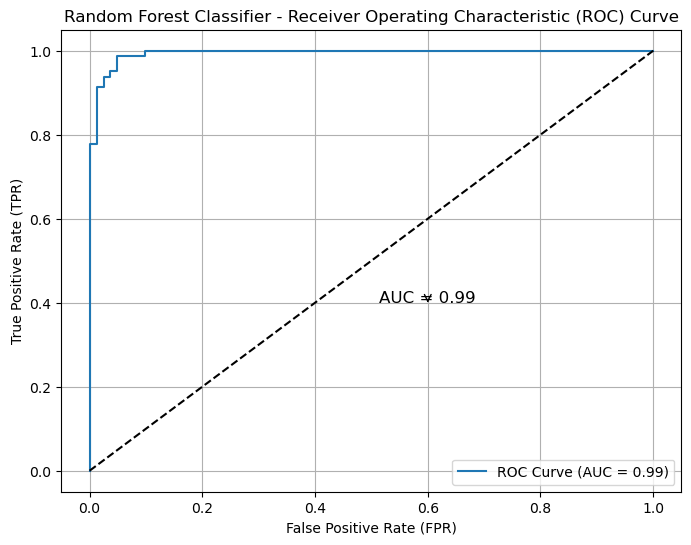

In [57]:
y_rf_prob_best = rf_model_best.predict_proba(X_test[selected_features_rf])[:, 1]

fpr_rf_best, tpr_rf_best, thresholds_rf_best = roc_curve(y_test, y_rf_prob_best)
auc_rf_best = roc_auc_score(y_test, y_rf_prob_best)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf_best, tpr_rf_best, label=f'ROC Curve (AUC = {auc_rf_best:.2f})')
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Random Forest Classifier - Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

plt.annotate(f'AUC = {auc_rf_best:.2f}', xy=(0.6, 0.4), xytext=(0.6, 0.4),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12, ha='center')

plt.grid(True)
plt.show()

### Decision Tree 

### Now , i will see the best parameters for our  decision tree  model

In [59]:
param_grid_dt = {
    'max_depth': [ 10, 20],  
    'min_samples_leaf': [1, 2, 4],
     'criterion':['entropy','gini']
}

dt_classifier = DecisionTreeClassifier(random_state=0)

grid_search_dt = GridSearchCV(dt_classifier, param_grid_dt, cv=5)
grid_search_dt.fit(X_train[selected_features_dt], y_train)

best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

print("Best Parameters for Decision Tree:", best_params_dt)
print("Best Score for Decision Tree:", best_score_dt)


Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1}
Best Score for Decision Tree: 0.9286666666666668


In [60]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=1, random_state=0)

dt_model.fit(X_train[selected_features_dt], y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=0)

In [61]:

y_dt_pred= dt_model.predict(X_test[selected_features_dt])
y_dt_pred

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [62]:
dt_cr=classification_report(y_test, y_dt_pred)
print(dt_cr)

              precision    recall  f1-score   support

           0       0.92      0.95      0.93        81
           1       0.95      0.91      0.93        81

    accuracy                           0.93       162
   macro avg       0.93      0.93      0.93       162
weighted avg       0.93      0.93      0.93       162



- **Precision**: The model correctly predicts negative cases (0) 92% of the time and positive cases (1) 95% of the time.
- **Recall**: The model captures 95% of actual positive cases and 91% of actual negative cases.
- **F1-score**: The harmonic mean of precision and recall is 93%, indicating a balance between precision and recall.
- **Accuracy**: The overall accuracy of the model is 93%, meaning it correctly predicts outcomes 93% of the time.

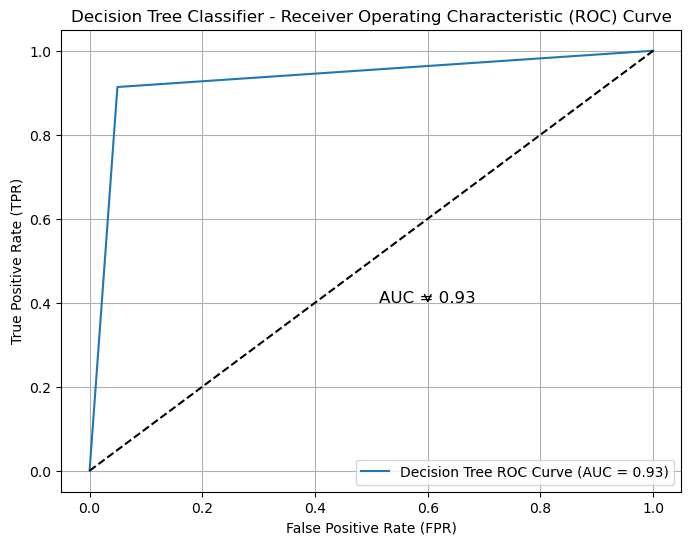

In [63]:

y_dt_prob = dt_model.predict_proba(X_test[selected_features_dt])[:, 1]

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_dt_prob)
auc_dt = roc_auc_score(y_test, y_dt_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree ROC Curve (AUC = {auc_dt:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Decision Tree Classifier - Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

plt.annotate(f'AUC = {auc_dt:.2f}', xy=(0.6, 0.4), xytext=(0.6, 0.4),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12, ha='center')

plt.grid(True)
plt.show()


<Figure size 640x480 with 0 Axes>

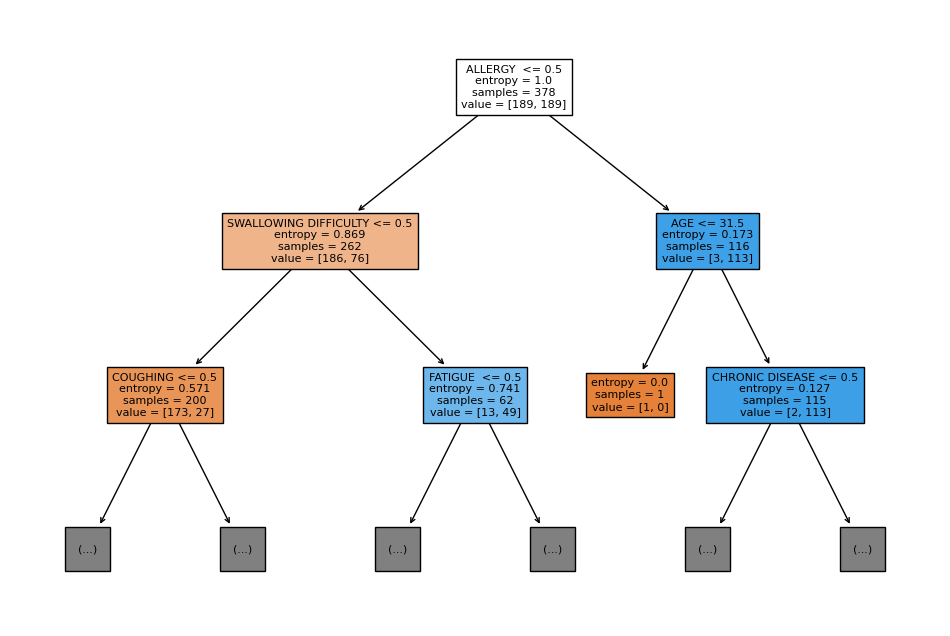

In [64]:
plt.clf()

max_depth = 2

plt.figure(figsize=(12, 8))
plot_tree(dt_model, max_depth=max_depth, feature_names=X_train[selected_features_dt].columns, filled=True,fontsize=8)
plt.show()

**Conclusion: Best Model Selection**

Based on the performance metrics obtained from our dataset, the Random Forest model stands out as the most suitable choice:
 the Random Forest model outperforms the Logistic Regression and Decision Tree models for our dataset. Its combination of high precision, recall, F1-score, and accuracy makes it a robust choice for classification tasks on our data.

### thank you for your attention 